# Thickness interference: A homogeneous glass layer in air
Author: O. Castany, M. Müller

This notebook shows the reflection and transmission of light through a thin slide of glass, dependent on the material thickness.

## Import required libraries

In [1]:
import numpy as np
import elli
import matplotlib.pyplot as plt

## Define Materials and Structure

We define the materials and construct a simple optical structure:
- Air as the incident and exit medium
- A single isotropic glass layer (n = 1.5) with variable thickness

In [2]:
# Materials:
air = elli.AIR
glass = elli.IsotropicMaterial(elli.ConstantRefractiveIndex(1.5))

# Layer and half-spaces:
layer = elli.Layer(glass, 1)
front = back = air

# Structure:
s = elli.Structure(front, [layer], back)

## Set Wavelength and Incidence Angle

In [3]:
# Wavelength and wavenumber:
lbda = 1000  # nm

# Incidence angle:
angle = 30   # degrees

## Sweep Over Layer Thickness

We now sweep the glass layer thickness from 0 to 1000 nm and compute the optical response at each step.
This shows how a parameter of the simulation could be changed and the results are combined into a ResultList.

In [4]:
h_list = np.linspace(0, 1000, 1000)

data = elli.ResultList()

for h in h_list:
    layer.set_thickness(h)
    data.append(s.evaluate(lbda, angle))

## Plot Reflection and Transmission

This cell visualizes how the reflection and transmission coefficients for s- and p-polarized light vary with layer thickness.
The resulting Fabry-Perot oscillations become aparent.

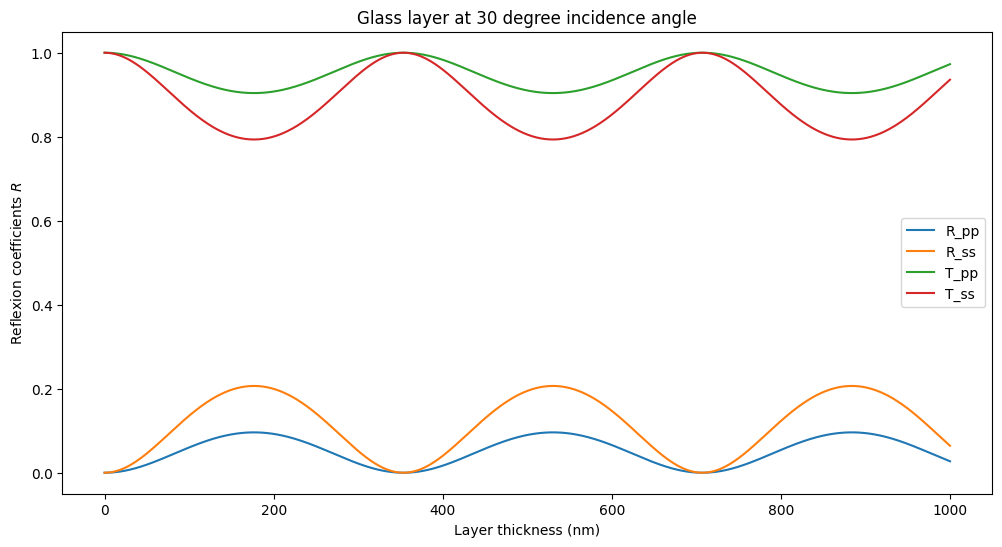

In [5]:
plt.figure(figsize=(12.0, 6.0))
plt.plot(h_list, data.R_pp, label="R_pp")
plt.plot(h_list, data.R_ss, label="R_ss")
plt.plot(h_list, data.T_pp, label="T_pp")
plt.plot(h_list, data.T_ss, label="T_ss")
plt.title("Glass layer at 30 degree incidence angle")
plt.xlabel("Layer thickness (nm)")
plt.ylabel(r"Reflexion coefficients $R$")
plt.legend()
plt.show()